In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import clean_data


# Preamble

With the anticipation of Monster Hunter Rise, I wanted to take a look at the previous games in the Monster Hunter series. Monster Hunter is a series of video games made by Capcom that you play as a hunter that hunts various different and unique monsters. Each new installment brings new Monsters, new ways to hunt the monsters and also brings older monsters from previous games. I will be looking at the monsters from the Global releases with the exception of Monster Hunter Portable 3rd and Monster Hunter 4 (which was only released in Japan). Each game in the series is a part of a generation. A base version is realease followed by a sequel (known as a ultimate expansion of the base game). the expansion brings more monsters.

### Table shows the titles that will be analyzed and which generation they belong to.

| Generation 1 | Generation 2 | Generation 3 | Generation 4 | Generation 5 |
|:------------:|:------------:|:------------:|:------------:|:------------:|
|Monster Hunter|Monster Hunter Freedom 2|Monster Hunter 3|Monster Hunter 4|Monster Hunter: World|
|Monster Hunter Freedom|Monster Hunter Freedom Unite|Monster Hunter 3 Ultmate|Monster Hunter 4 Ultimate|Monster Hunter World: Iceborne|
|              |              |Monster Hunter Portable 3rd|Monster Hunter Generations|Monster Hunter Rise|
|              |              |            |Monster Hunter Generations Ultimate|          |




# Import Data

There are 3 csv files that was manualy made that include data such as monsters in each games, specific monster data, and title information


In [2]:
mh_data = clean_data.get_data()
mh_data

,Name,Type,Size,Title,Country Released,Date Released,Generation,Director,Console
0,Abyssal Lagiacrus,Leviathan,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
1,Abyssal Lagiacrus,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
2,Agnaktor,Leviathan,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
3,Agnaktor,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
4,Alatreon,Elder Dragon,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
...,...,...,...,...,...,...,...,...,...
2496,Vespoid,Neopteron,Small,Monster Hunter Freedom,North America,2006-05-23,1,Yasunori Ichinose,Playstation Portable
2497,White Monoblos,Flying Wyvern,Large,Monster Hunter Freedom,JPN,2005-12-01,1,Yasunori Ichinose,Playstation Portable
2498,White Monoblos,Flying Wyvern,Large,Monster Hunter Freedom,North America,2006-05-23,1,Yasunori Ichinose,Playstation Portable
2499,Yian Kut-Ku,Bird Wyvern,Large,Monster Hunter Freedom,JPN,2005-12-01,1,Yasunori Ichinose,Playstation Portable



# 1

I wanted to see what how many monsters and what the proportion between new monsters to monster that were already introduced.

The analysis will be done on the following titles:
* Monster Hunter
* Monster Hunter Freedom 2
* Monster Hunter 3
* Monster Hunter Portable 3rd
* Monster Hunter 4
* Monster Hunter Generations
* Monster Hunter: World
* Monster Hunter Rise
* Monster Hunter Freedom
* Monster Hunter Freedom Unite
* Monster Hunter 3 Ultimate
* Monster Hunter 4 Ultimate
* Monster Hunter Generations Ultimate
* Monster Hunter World: Iceborne

We can filter the titles we want to analyze and for each title obtain:
* Amount of total monsters
* Amount of large monsters
* Amount of small monsters
* Amount of new monsters
* Amount of new large monsters
* Amount of new small monsters
    
    *note: the difference between size of a monsters is that large monsters are considered "bosses"*

in order to find the new monsters in the title, we need to get the list of monsters from title and a list of monsters from all previous titles and take the difference of the previous monsters and the title monsters.





In [3]:
analysis_titles = pd.DataFrame(
    {"Base": pd.Series(['Monster Hunter','Monster Hunter Freedom 2', 'Monster Hunter 3', 'Monster Hunter Portable 3rd',
              'Monster Hunter 4','Monster Hunter Generations', 'Monster Hunter: World', 'Monster Hunter Rise',]),
     "Ultimate": pd.Series(['Monster Hunter Freedom', 'Monster Hunter Freedom Unite', 'Monster Hunter 3 Ultimate', np.nan, 
            'Monster Hunter 4 Ultimate', 'Monster Hunter Generations Ultimate', 'Monster Hunter World: Iceborne', np.nan,])})

analysis_titles_lst = analysis_titles['Base'].append(analysis_titles['Ultimate']).dropna()
# filter for analysis Titles
titles_search_data = mh_data[mh_data['Title'].isin(analysis_titles_lst)==True]
# Organzing titles by generation for the figures
valid_titles = mh_data[['Title','Generation']].drop_duplicates().sort_values(by=['Generation','Title'])
valid_titles = valid_titles[valid_titles['Title'].isin(analysis_titles_lst) == True]
valid_titles = valid_titles.groupby(['Generation']).agg(list)
amt_monsters_df = pd.DataFrame(columns=['Title','Release Date','Total Monsters', 'Large Monsters','Small Monsters',
                      'New Monsters', 'New Large Monster', 'New Small Monsters'])
output = []

for row in valid_titles.iterrows():
    labels = []
    amt_monsters = []
    large_monters = []
    small_monsters = []
    total_new_monsters = []
    new_large_monsters = []
    new_small_monsters = []
    for title in row[1][0]:
        title_data = titles_search_data[titles_search_data['Title'] == title]
        title_date = min(title_data['Date Released'])
        
        monsters_from_prev_games = titles_search_data[titles_search_data['Date Released'] < title_date]['Name'].drop_duplicates()
        monsters_in_title = title_data[['Name','Type','Size']].drop_duplicates()
        new_monsters = monsters_in_title[monsters_in_title['Name'].isin(monsters_from_prev_games) == False]
        labels.append(title)
        amt_monsters.append( monsters_in_title['Name'].count() )
        large_monters.append( monsters_in_title.groupby(['Size']).size().Large )
        small_monsters.append( monsters_in_title.groupby(['Size']).size().Small )
        total_new_monsters.append( new_monsters['Name'].count() )
        
        try:
            new_large_t_monsters = new_monsters.groupby(['Size']).size().Large
        except:
            new_large_t_monsters = 0
        try:
            new_small_t_monsters = new_monsters.groupby(['Size']).size().Small
        except:
            new_small_t_monsters = 0
            
        new_large_monsters.append(new_large_t_monsters)
        new_small_monsters.append(new_small_t_monsters)
        df_segment = pd.DataFrame(
                          [[title,
                          title_date,
                          monsters_in_title['Name'].count(),
                          monsters_in_title.groupby(['Size']).size().Large,
                          monsters_in_title.groupby(['Size']).size().Small,
                          new_monsters['Name'].count(),
                          new_large_t_monsters,
                          new_small_t_monsters]],
                            columns=['Title','Release Date','Total Monsters', 'Large Monsters','Small Monsters',
                      'New Monsters', 'New Large Monster', 'New Small Monsters'])
        amt_monsters_df = pd.concat([amt_monsters_df,df_segment])
    output.append( [labels,amt_monsters,large_monters,small_monsters,total_new_monsters,new_large_monsters,new_small_monsters] )

amt_monsters_df = amt_monsters_df.sort_values(by=['Release Date'])
amt_monsters_df

,Title,Release Date,Total Monsters,Large Monsters,Small Monsters,New Monsters,New Large Monster,New Small Monsters
0,Monster Hunter,2004-03-11,30,18,12,30,18,12
0,Monster Hunter Freedom,2005-12-01,44,32,12,14,14,0
0,Monster Hunter Freedom 2,2007-02-22,70,48,22,27,17,10
0,Monster Hunter Freedom Unite,2008-03-27,81,59,22,11,11,0
0,Monster Hunter 3,2009-08-01,35,20,15,26,16,10
0,Monster Hunter Portable 3rd,2010-12-01,60,42,18,20,17,3
0,Monster Hunter 3 Ultimate,2011-12-10,73,53,20,11,10,1
0,Monster Hunter 4,2013-09-14,72,54,18,16,14,2
0,Monster Hunter 4 Ultimate,2015-02-13,98,77,21,12,12,0
0,Monster Hunter Generations,2016-07-15,105,73,32,22,19,3


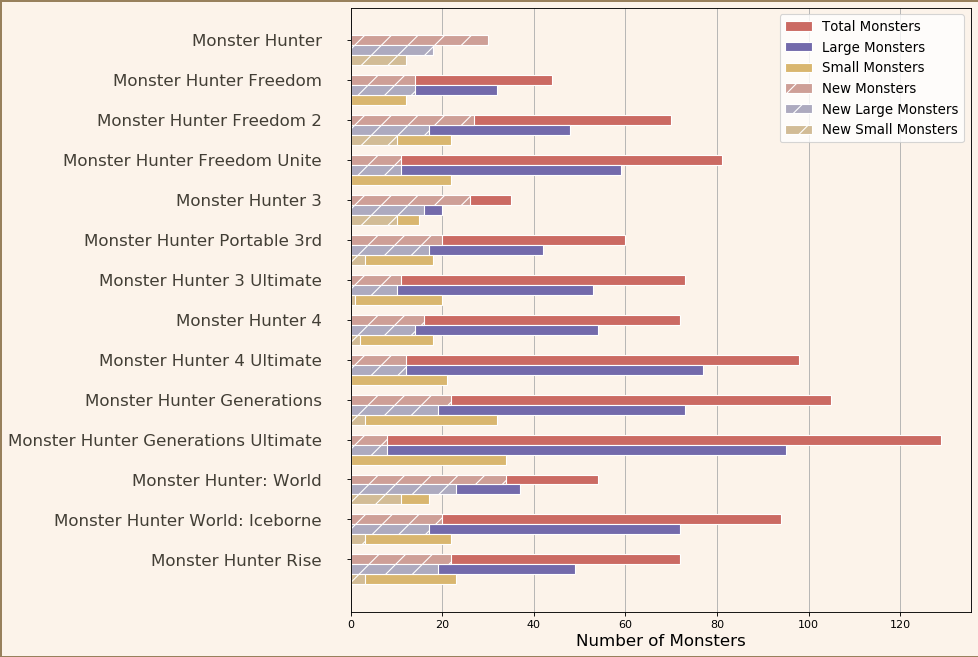

In [4]:
labels = amt_monsters_df['Title'].apply(lambda x: x + " " * 4 )
amt_monsters = amt_monsters_df['Total Monsters']
large_monters = amt_monsters_df['Large Monsters']
small_monsters = amt_monsters_df['Small Monsters']
total_new_monsters = amt_monsters_df['New Monsters']
new_large_monsters = amt_monsters_df['New Large Monster']
new_small_monsters = amt_monsters_df['New Small Monsters']
fig, ax = plt.subplots(figsize=(10, 10), dpi=80)
ax.grid(axis='x',zorder=0)
width = 0.25
rects1 = np.arange(len(labels))
rects2 = [x + width for x in rects1]
rects3 = [x + width for x in rects2]
rects4 = rects1
rects5 = rects2
rects6 = rects3
ax.barh(rects1, amt_monsters, height=width,edgecolor='white', label='Total Monsters',color='#cb6a63',zorder=2)
ax.barh(rects2, large_monters, height=width,edgecolor='white', label='Large Monsters',color='#736aab',zorder=2)
ax.barh(rects3, small_monsters, height=width,edgecolor='white', label='Small Monsters',color='#d9b66f',zorder=2)
ax.barh(rects4, total_new_monsters, height=width,edgecolor='white', label='New Monsters',color='#ce9f97',hatch='/',zorder=2)
ax.barh(rects5, new_large_monsters, height=width,edgecolor='white', label='New Large Monsters',color='#adaabf',hatch='/',zorder=2)
ax.barh(rects6, new_small_monsters, height=width,edgecolor='white', label='New Small Monsters',color='#d2bc96',hatch='/',zorder=2)
ax.set_xlabel("Number of Monsters", fontsize='15')
ax.set_yticks(rects1)
ax.set_yticklabels(labels,fontsize='15',color='#423e35')
ax.legend(fontsize='12')
ax.invert_yaxis()

ax.set_facecolor('#fcf3ea')
fig.set_facecolor('#fcf3ea')
fig.set_edgecolor(color='#98805c')
fig.patch.set_linewidth('1')  
fig.savefig('Figures/amt_monsters.png',
            facecolor=fig.get_facecolor(),
            edgecolor=fig.get_edgecolor(),
            bbox_inches="tight")

(array([100.,  13.,  57.,   4.,  21.,   6.,   7.,   4.,   1.,   2.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

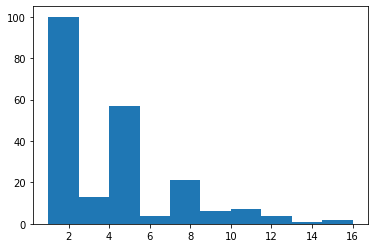

In [5]:
monster_occurance_data = mh_data[mh_data['Title'].isin(analysis_titles_lst) == True]
filter_exclude_jpn = monster_occurance_data['Country Released'] != 'JPN'
filter_title_except = (monster_occurance_data['Title'] == 'Monster Hunter Portable 3rd') | (monster_occurance_data['Title'] == 'Monster Hunter 4')
filter_large = monster_occurance_data['Size'] == 'Large'
monster_occurance_data_p1 = monster_occurance_data.where(filter_exclude_jpn & filter_large).dropna()
monster_occurance_data_p2 = monster_occurance_data.where(filter_title_except& filter_large).dropna()
monster_occurance_data = pd.concat([monster_occurance_data_p1,monster_occurance_data_p2])
monster_occurance_data = monster_occurance_data.groupby(['Name'])['Type'].count().sort_values(ascending=True)
monster_occurance_data
plt.hist(monster_occurance_data.values)

(array([38.,  9., 44.,  3., 19.,  6.,  2.,  4.,  1.,  2.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

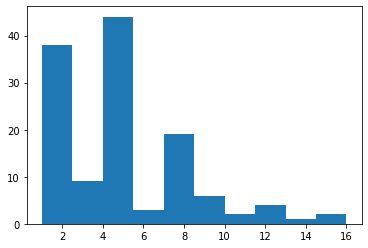

In [6]:
import re
monster_occurance_data_df = monster_occurance_data.to_frame().reset_index()
newIndex = monster_occurance_data_df['Name'].str.len().sort_values().index
monster_occurance_data_df = monster_occurance_data_df.reindex(newIndex)
list_monsters = monster_occurance_data_df['Name'].to_list()
for monster in list_monsters:
    m = re.compile(monster)
    for monsterX in list_monsters:
        if m.search(monsterX):
            if monsterX != monster:
                list_monsters.remove(monsterX)
list_nonVarient_monsters = list_monsters
monster_occurance_data_df = monster_occurance_data_df[monster_occurance_data_df['Name'].isin(list_nonVarient_monsters) == True]
plt.hist(monster_occurance_data_df['Type'])

### Sorting monsters to Directors
I want to find if a director is more likely to use monsters that they have introduced
I want to get the data to have the relavant titles
total_new_monsters

In [7]:
title_data = mh_data[mh_data['Title'].isin(analysis_titles_lst) == True]
filter_exclude_jpn = title_data['Country Released'] != 'JPN'
filter_title_except = title_data['Title'] == 'Monster Hunter Portable 3rd'
filter_large = title_data['Size'] == 'Large'

title_data_p1 = title_data.where(filter_exclude_jpn & filter_large).dropna()
title_data_p2 = title_data.where(filter_title_except & filter_large).dropna()
title_data = pd.concat([title_data_p1,title_data_p2])

title_data[['Title','Director']].drop_duplicates(subset='Title').groupby('Director').count()
director_data = title_data.sort_values(by=['Name','Date Released']).drop_duplicates(subset=['Name'],keep='first')
director_data[director_data['Director'] == 'Kaname Fujioka']
# Kaname_monsters = director_data[director_data['Director'] == 'Kaname Fujioka']
# Yasunori_monsters = director_data[director_data['Director'] == 'Yasunori Ichinose']

,Name,Type,Size,Title,Country Released,Date Released,Generation,Director,Console
1,Abyssal Lagiacrus,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3.0,Kaname Fujioka,3DS
523,Agnaktor,Leviathan,Large,Monster Hunter 3,North America,2010-04-20,3.0,Kaname Fujioka,Wii
525,Alatreon,Elder Dragon,Large,Monster Hunter 3,North America,2010-04-20,3.0,Kaname Fujioka,Wii
1725,Ash Kecha Wacha,Fanged Beast,Large,Monster Hunter 4 Ultimate,North America,2015-02-13,4.0,Kaname Fujioka,3DS
535,Barioth,Flying Wyvern,Large,Monster Hunter 3,North America,2010-04-20,3.0,Kaname Fujioka,Wii
...,...,...,...,...,...,...,...,...,...
1807,Tigerstripe Zamtrios,Amphibian,Large,Monster Hunter 4 Ultimate,North America,2015-02-13,4.0,Kaname Fujioka,3DS
587,Uragaan,Brute Wyvern,Large,Monster Hunter 3,North America,2010-04-20,3.0,Kaname Fujioka,Wii
2330,Velocidrome,Bird Wyvern,Large,Monster Hunter,North America,2004-09-21,1.0,Kaname Fujioka,PlayStation 2
2336,Yian Kut-Ku,Bird Wyvern,Large,Monster Hunter,North America,2004-09-21,1.0,Kaname Fujioka,PlayStation 2


In [8]:
jpn_titles = pd.DataFrame(
    {"Base": pd.Series(['Monster Hunter','Monster Hunter Freedom 2', 'Monster Hunter 3',
              'Monster Hunter 4','Monster Hunter X', 'Monster Hunter: World',]),
     "Ultimate": pd.Series(['Monster Hunter G', 'Monster Hunter Freedom Unite', 'Monster Hunter 3 Ultimate',
            'Monster Hunter 4 G', 'Monster Hunter XX', 'Monster Hunter World: Iceborne'])})
jpn_titles_lst = jpn_titles['Base'].append(jpn_titles['Ultimate']).dropna()

jpn_title_data = mh_data[mh_data['Title'].isin(jpn_titles_lst) == True]
jpn_title_data = jpn_title_data[jpn_title_data['Country Released'] != 'North America']
jpn_title_data = jpn_title_data[['Title','Date Released']].sort_values(by=['Date Released']).drop_duplicates(subset=['Title'],keep='first')

base = pd.merge(jpn_title_data, jpn_titles,left_on='Title',right_on="Base",how='right').dropna()[['Title','Date Released']]
ultimate = pd.merge(jpn_title_data, jpn_titles,left_on='Title',right_on="Ultimate",how='left').dropna()[['Title','Date Released']]
base = base.reset_index(drop=True).reset_index()
ultimate = ultimate.reset_index(drop=True).reset_index()

jpn_date_data = pd.merge(base,ultimate,on='index')
jpn_date_data['date_difference'] = abs( jpn_date_data['Date Released_y'] - jpn_date_data['Date Released_x'])
jpn_date_data['date_difference'].mean().days/30.5

16.557377049180328